## NAME: Pradyumna Revur
# CSCI S-89 DEEP LEARNING
# ASSIGNMENT 1

### Problem 1 (45 points)
Please load ‘Housing_Data.csv’, the housing data for Singapore. This data set is also available at https://www.kaggle.com/chenzhiliang/housing-data. Using Keras, build a Neural Network with one hidden layer which has two neurons to predict the price based on ‘floorArea’ and ‘bedrooms’. You may implement either batch or mini-batch gradient descent algorithm. Make sure to use appropriate loss and activation functions. Plot the train and test errors versus iteration step.


### SOLUTION:

- Input to the NN is floor area (column 5) and bedrooms (column 6).
- Output is the predicted house value
- House value in the data is in (column 4)
- The first line in the input is a header line that needs to be skipped
- Skipping data validation for this assignment because visual inspection shows valid data in the columns we are interested in

Parse housing data into input and expected output data frames

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24564 entries, 0 to 24563
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   value      24564 non-null  float64
 1   floorArea  24563 non-null  float64
 2   bedrooms   24564 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 575.8 KB
0 1 0
bedrooms
1      172
2     4653
3    16607
4     2966
5      147
6       18
7        1
Name: count, dtype: int64 floorArea
0.056      1
0.057      1
0.058      1
0.059      7
0.060      2
          ..
2.131      1
2.314      1
7.760      1
19.224     1
124.816    1
Name: count, Length: 555, dtype: int64 value
2.10000     4
2.12000     1
2.15000     2
2.18000     1
2.19999     2
           ..
18.00000    3
18.80000    1
19.00000    1
20.00000    1
21.50000    1
Name: count, Length: 877, dtype: int64


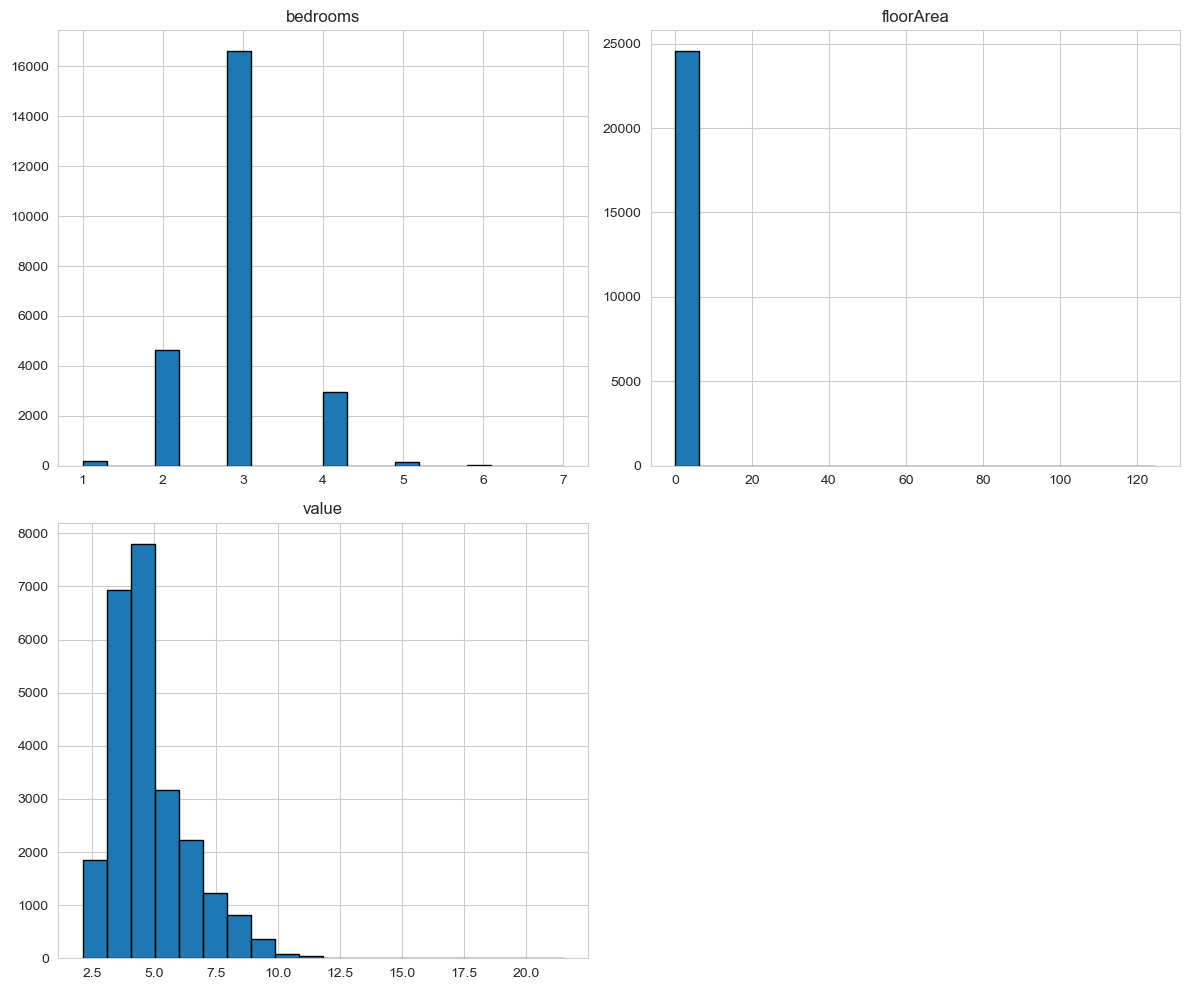

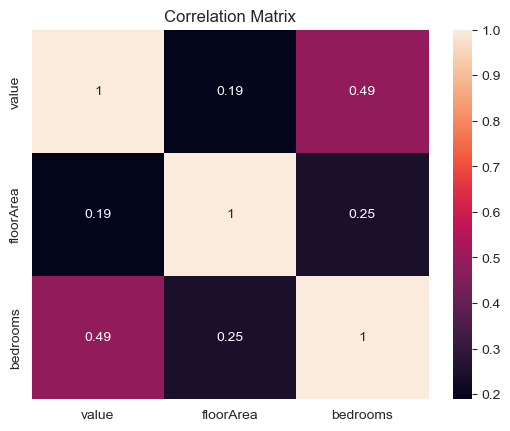

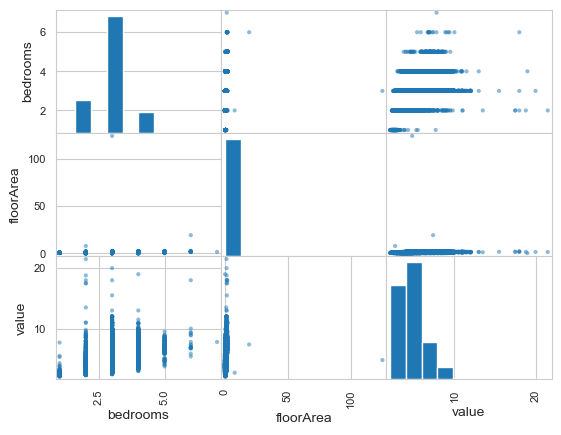

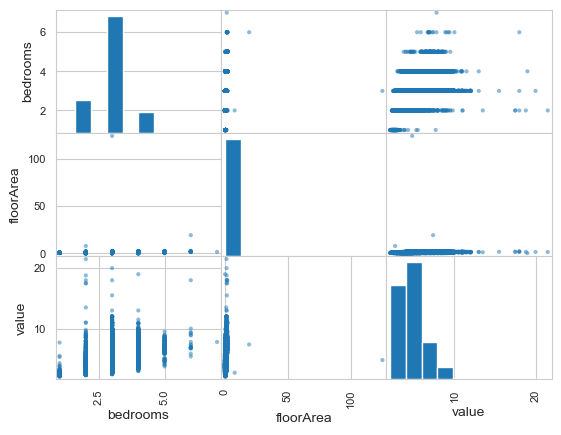

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rich.jupyter import display

# Parse data into data frame
df_housing = pd.read_csv('data/Housing_Data.csv', usecols=['bedrooms','floorArea', 'value'],
                 converters={'bedrooms': lambda x: pd.to_numeric(x, errors='coerce'),
                             'floorArea': lambda x: pd.to_numeric(x, errors='coerce') / 1000,
                             'value': lambda x: pd.to_numeric(x, errors='coerce') / 100000})
# df_housing[['bedrooms', 'floorArea', 'value']].hist(bins=100)
df_housing.head(15)
df_housing.info()
print(df_housing['bedrooms'].isna().sum(), df_housing['floorArea'].isna().sum(), df_housing['value'].isna().sum())
print(df_housing['bedrooms'].value_counts().sort_index(), df_housing['floorArea'].value_counts().sort_index(), df_housing['value'].value_counts().sort_index())

df_housing[['bedrooms', 'floorArea', 'value']].hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.tight_layout()
plt.show()
corr_matrix = df_housing.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()
# Drop rows where 'floorArea' exceeds 5000 after looking at initial histogram
# filtered_df = df_housing[df_housing['floorArea'] <= 5000]
# filtered_df[['bedrooms', 'floorArea', 'value']].hist(bins=20, figsize=(12, 10), edgecolor='black')
# plt.tight_layout()
# plt.show()

# corr_matrix = df_housing.corr(numeric_only=True)
# sns.heatmap(corr_matrix, annot=True)
# plt.title('Correlation Matrix')
# plt.show()

from pandas.plotting import scatter_matrix
scatter_matrix(df_housing[['bedrooms', 'floorArea', 'value']])
plt.show()
scatter_matrix(df_housing[['bedrooms', 'floorArea', 'value']])
plt.show()



### Construct model
- Input layer with two nodes for floor area and number of bedrooms
- One hidden layer with two nodes
- Output layer with one node to output the predicted home value

In [2]:
from keras import models
from keras import layers
from keras import Input

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# create copies

X = df_housing[['bedrooms', 'floorArea']].copy()
y = df_housing['value'].copy()

# drop missing data

X = X.dropna()
y = y.loc[X.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split 80/20 into train and test set

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

n = 2  #2 inputs - floor area and number of bedrooms

model = models.Sequential()
model.add(layers.Dense(2, activation='relu'))  # hidden layer with 2 nodes
model.add(layers.Dense(1, activation='relu'))  # output - predicted value

model.summary()

(19650, 2) (4913, 2) (19650,) (4913,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
nepochs = 10

model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X, y, epochs=nepochs, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/10
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.0000e+00 - loss: 13.2198 - val_accuracy: 0.0000e+00 - val_loss: 2.0203
Epoch 2/10
615/615 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.0000e+00 - loss: 1.9315 - val_accuracy: 0.0000e+00 - val_loss: 1.8301
Epoch 3/10
615/615 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.0000e+00 - loss: 1.7875 - val_accuracy: 0.0000e+00 - val_loss: 1.7653
Epoch 4/10
615/615 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.0000e+00 - loss: 1.7012 - val_accuracy: 0.0000e+00 - val_loss: 1.7366
Epoch 5/10
615/615 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.0000e+00 - loss: 1.7768 - val_accuracy: 0.0000e+00 - val_loss: 1.6985
Epoch 6/10
615/615 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.0000e+00 - loss: 1.6853 - val_accuracy: 0.0000e+00 - val_loss: 1.7028
Epoch 7/10
615/615 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.0000e+00 - loss: 1.7779 - val_accuracy: 0.0000e+00 - val_loss: 1.7174
Epoch 8/10
615/615 ━━━━━━━━━━━━━━